##  [Tignanello 2015](https://www.wine.com/product/antinori-tignanello-2015/423033#)
## [Chateau Lafite Rothschild, Pauillac 2009](https://www.wine.com/product/chateau-lafite-rothschild-2009/111778)
Given two wines, and please recommend which one we purchase and provide the reason behind the decision. 

### Lwins
These are unique numbers to wine, containing the basic number for the wine itself. lwin 11 has the lwin 7 plus the vintage. The last 7 digits are case count ie 03, 06, 12 (number of bottles in a case). Then the volume (00750) for 750ml bottle.

Liv-EX 100 Index, check if one of them is inside. https://www.liv-ex.com/wwd/automation/

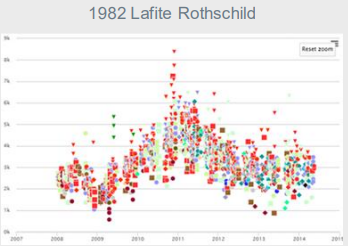

In [1]:
!python --version

Python 3.7.8


In [2]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt 
%matplotlib inline

chateau = pd.read_csv('./Lafite Rothschild_2009.csv', index_col='price_date')
tignanello = pd.read_csv('./Tignanello_2015.csv', index_col='price_date')

In [3]:
chateau.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3620 entries, 2010-07-23 to 2020-05-27
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lwin_18     3620 non-null   int64 
 1   price_type  3620 non-null   object
 2   price       3620 non-null   int64 
 3   created_at  3620 non-null   object
 4   updated_at  3620 non-null   object
dtypes: int64(2), object(3)
memory usage: 169.7+ KB


In [4]:
tignanello.info()

<class 'pandas.core.frame.DataFrame'>
Index: 849 entries, 2018-03-11 to 2020-05-27
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lwin_18     849 non-null    int64 
 1   price_type  849 non-null    object
 2   price       849 non-null    int64 
 3   created_at  849 non-null    object
 4   updated_at  849 non-null    object
dtypes: int64(2), object(3)
memory usage: 39.8+ KB


In [5]:
chateau['price'].isnull().sum()

0

In [6]:
tignanello.isnull().sum()

lwin_18       0
price_type    0
price         0
created_at    0
updated_at    0
dtype: int64

There is no missing values and all price data is sorted by the datetime, ranging roughly from 2010-2020. 

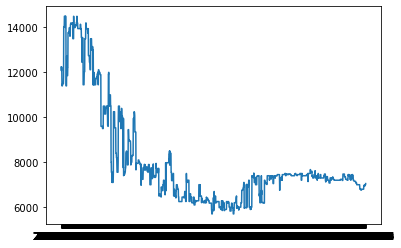

In [7]:
plt.plot(chateau['price'])

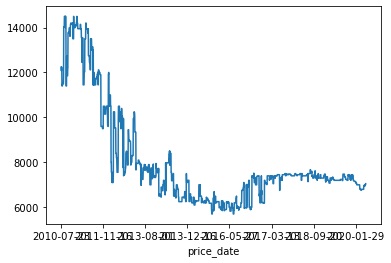

In [8]:
chateau['price'].plot()
plt.show()

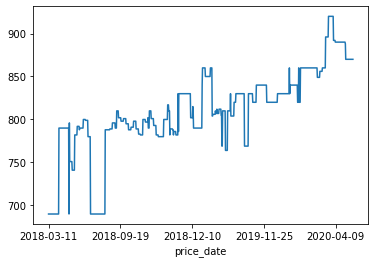

In [9]:
tignanello['price'].plot()
plt.show()

### Explanation
- Hypothesis Testing with linear regression models

common in statistics and simple financial predictions, also common in wine literature, currently after research. 

/Users/sherrytp/opt/anaconda3/envs/ml4t/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/sherrytp/opt/anaconda3/envs/ml4t/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:587: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
/Users/sherrytp/opt/anaconda3/envs/ml4t/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/sherrytp/opt/anaconda3/envs/ml4t/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:587: ValueWarning: A date index has been provide

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3262      0.069     -4.708      0.000      -0.462      -0.190
ma.L1          0.1873      0.073      2.564      0.010       0.044       0.330
ar.S.L12      -0.4688      0.004   -110.867      0.000      -0.477      -0.461
sigma2      5.852e+04    340.473    171.879      0.000    5.79e+04    5.92e+04


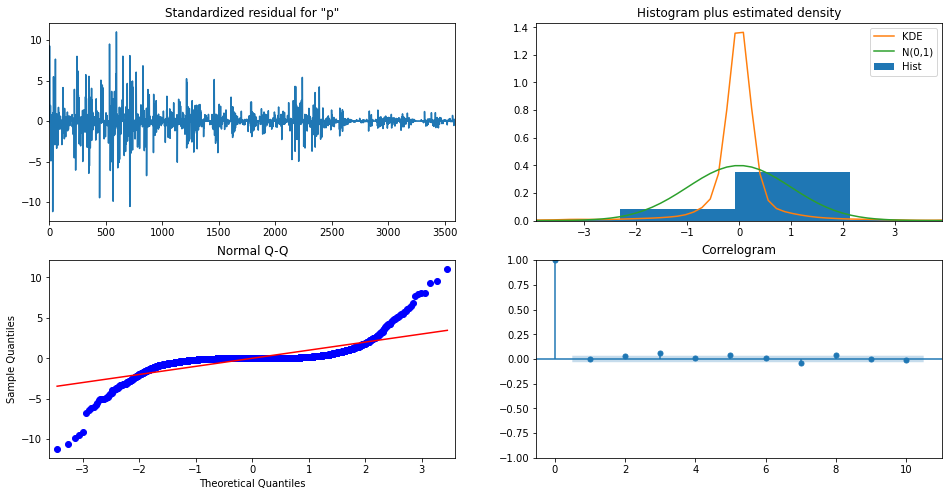

In [10]:
mod_ch = sm.tsa.statespace.SARIMAX(chateau['price'], 
                                order = (1, 1, 1),
                                seasonal_order = (1, 1, 0, 12),
                                enforce_stationarity = False,
                                enforce_invertibility = False)
results_ch = mod_ch.fit()
print(results_ch.summary().tables[1])
results_ch.plot_diagnostics(figsize = (16, 8))
plt.show()

/Users/sherrytp/opt/anaconda3/envs/ml4t/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/sherrytp/opt/anaconda3/envs/ml4t/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:587: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
/Users/sherrytp/opt/anaconda3/envs/ml4t/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/sherrytp/opt/anaconda3/envs/ml4t/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:587: ValueWarning: A date index has been provide

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1635      0.196     -0.833      0.405      -0.548       0.221
ma.L1         -0.0348      0.199     -0.175      0.861      -0.424       0.354
ar.S.L12      -0.4991      0.011    -46.634      0.000      -0.520      -0.478
sigma2       172.8000      2.634     65.605      0.000     167.638     177.962


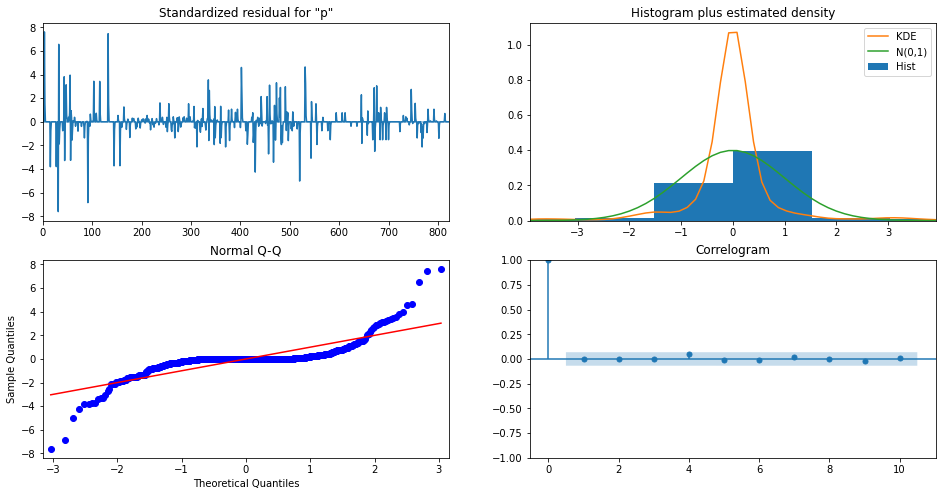

In [11]:
mod_ti = sm.tsa.statespace.SARIMAX(tignanello['price'], 
                                order = (1, 1, 1),
                                seasonal_order = (1, 1, 0, 12),
                                enforce_stationarity = False,
                                enforce_invertibility = False)
results_ti = mod_ti.fit()
print(results_ti.summary().tables[1])
results_ti.plot_diagnostics(figsize = (16, 8))
plt.show()

### Machine Learning 
- utilize predictive machine learning algorithms, or even black-box algorithms, eg NN

Focus on prediction accuracy, only common in AI fintech areas. 